## Observations and Insights

## Dependencies and starter code

In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata,study_results,on='Mouse ID')

Mouse ID               object
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for 
stats_data = combined_data['Tumor Volume (mm3)'].groupby(combined_data['Drug Regimen']).mean().to_frame()
stats_data['Median'] = combined_data['Tumor Volume (mm3)'].groupby(combined_data['Drug Regimen']).median()
stats_data['St. Deviation'] = combined_data['Tumor Volume (mm3)'].groupby(combined_data['Drug Regimen']).std()
stats_data['Variance'] = combined_data['Tumor Volume (mm3)'].groupby(combined_data['Drug Regimen']).var()
stats_data['St. Error'] = combined_data['Tumor Volume (mm3)'].groupby(combined_data['Drug Regimen']).sem()
stats_data = stats_data.rename(columns = {'Tumor Volume (mm3)' : 'Mean'})
stats_data

,Mean,Median,St. Deviation,Variance,St. Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.322552,50.854632,6.507770,42.351070,0.512884
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


## Bar plots

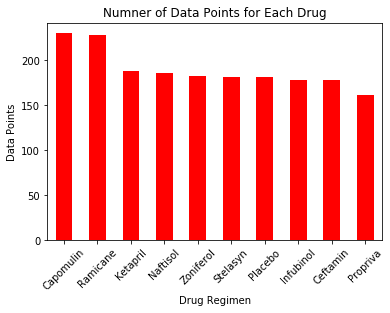

In [62]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
drug_dp = combined_data['Drug Regimen'].value_counts().to_frame().reset_index()
drug_dp = drug_dp.rename(columns = {'index' : 'Drug Regimen' , 'Drug Regimen' : 'Data Points'})


drug_dp.plot(kind='bar',rot=45, title = 'Numner of Data Points for Each Drug',x='Drug Regimen', 
             y='Data Points',color='r' , legend = False)
plt.xlabel('Drug Regimen')
plt.ylabel('Data Points')
plt.show()

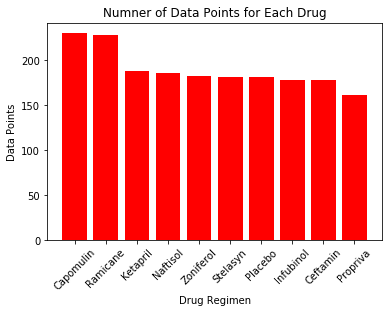

In [63]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
plt.bar(drug_dp['Drug Regimen'], drug_dp['Data Points'], color='r')
plt.xticks(rotation=45)
plt.xlabel('Drug Regimen')
plt.ylabel('Data Points')
plt.title('Numner of Data Points for Each Drug')
plt.show()

## Pie plots

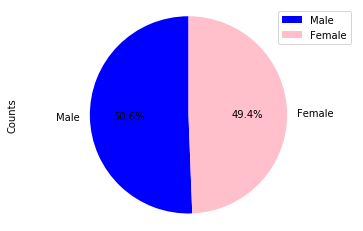

In [65]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_dp = combined_data['Sex'].value_counts().to_frame()
gender_dp = gender_dp.rename(columns = {'Sex' : 'Counts'})

color = ['Blue','Pink']
gender_pp = gender_dp.plot(kind='pie', y='Counts', autopct='%1.1f%%',startangle=90, 
                           shadow=False, labels=gender_dp.index,colors=color)
plt.axis('equal')
plt.show()

C:\Users\rajka\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


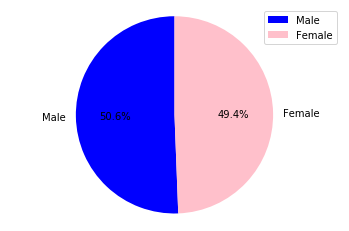

In [66]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_dp, labels=gender_dp.index, autopct='%1.1f%%', startangle=90, shadow = False, colors=color)
plt.legend(gender_dp.index, loc="best")
plt.axis('equal')
plt.show()

## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
#Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [76]:
promosing_drug = stats_data.sort_values(by='St. Error').reset_index().loc[:3,'Drug Regimen'].tolist()
print(f"Most promising drugs : {promosing_drug[0]},{promosing_drug[1]} ,{promosing_drug[2]},{promosing_drug[3]}")

dummy_1 = combined_data[['Timepoint','Tumor Volume (mm3)','Drug Regimen']].groupby(combined_data['Mouse ID']).max()

dummy_2 = dummy_1[(dummy_1['Drug Regimen'] == 'Capomulin') | (dummy_1['Drug Regimen'] == 'Ceftamin') | 
                (dummy_1['Drug Regimen'] == 'Infubinol') | (dummy_1['Drug Regimen'] == 'Ramicane')]
dummy_2 = dummy_2.reset_index()

quartiles = dummy_2['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

outlier = dummy_2[((dummy_2['Tumor Volume (mm3)'] > upper_bound) | 
                   (dummy_2['Tumor Volume (mm3)'] < lower_bound))].index.tolist()

print(f"There are {len(outlier)} outliers in my data")

Most promising drugs : Ramicane,Capomulin ,Ceftamin,Infubinol
There are 0 outliers in my data


In [104]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

Text(0, 0.5, 'Tumor Volume (mm3)')

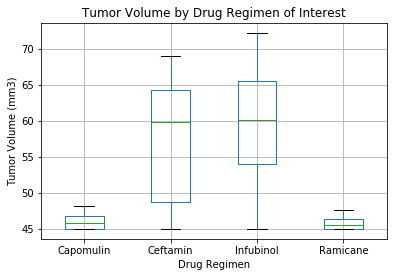

In [105]:
boxplot = dummy_2.boxplot(column=['Tumor Volume (mm3)'], by = 'Drug Regimen')
plt.title('Tumor Volume by Drug Regimen of Interest')
plt.suptitle('')
plt.ylabel('Tumor Volume (mm3)')

## Line and scatter plots

In [9]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

Text(0, 0.5, 'Tumpr Volume (mm3)')

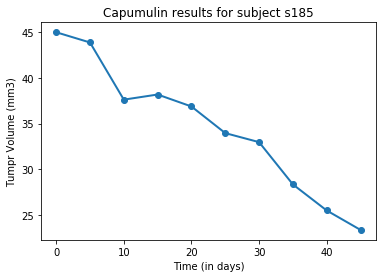

In [103]:
dummy_3 = combined_data[['Tumor Volume (mm3)','Timepoint']].loc[(combined_data['Drug Regimen'] == 'Capomulin') & 
                                                                (combined_data['Mouse ID'] == 's185')]

plt.plot(dummy_3['Timepoint'],dummy_3['Tumor Volume (mm3)'], marker='o', linewidth=2, markersize=6)
plt.title('Capumulin results for subject s185')
plt.xlabel('Time (in days)')
plt.ylabel('Tumpr Volume (mm3)')

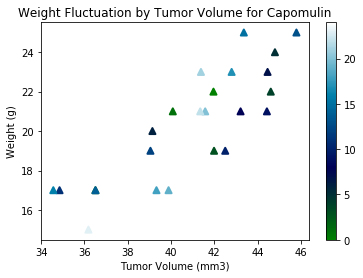

In [98]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
dummy_4 = combined_data[['Tumor Volume (mm3)','Weight (g)']].loc[(combined_data['Drug Regimen'] == 
                                                                  'Capomulin')].groupby(combined_data['Mouse ID']).mean()
dummy_4 = dummy_4.reset_index()
plt.scatter(dummy_4['Tumor Volume (mm3)'],dummy_4['Weight (g)'] , marker = '^' , linewidths=2 , c=dummy_4.index , cmap='ocean')
plt.colorbar()
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Weight (g)')
plt.title('Weight Fluctuation by Tumor Volume for Capomulin')
plt.show()


In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor 
#volume for the Capomulin regimen

0.84
y = 0.74x + -10.15
The r-squared is: 0.8419363424694716


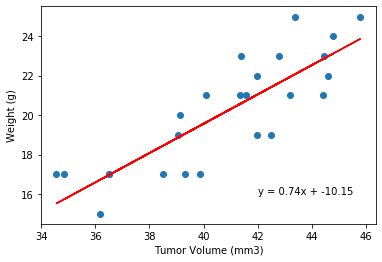

In [99]:
correlation_coeff = round(st.pearsonr(dummy_4['Tumor Volume (mm3)'],dummy_4['Weight (g)'])[0],2)
print(correlation_coeff)

x_values = dummy_4['Tumor Volume (mm3)']
y_values = dummy_4['Weight (g)']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(42,16),fontsize=10,color="black")
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Weight (g)')
print(f"The r-squared is: {rvalue}")
plt.show()  

## Observations:
1. Tumor volume decreses for regular use of Capomulin
2. There is a positive correlation between Tumor Volume and Weight of the subjects. Which implies that as Tumor increases weight of the subject also increses. 
3. Capomulin shows the maximum promise in reducing Tumor cells